In [185]:
pip install seaborn #Installation of Seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing all libraries, Machine Learning Models and Evaluation Metrics
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score







In [3]:
# Importing the datasets
df=pd.read_csv("heart11.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [191]:
# Checks for Nan Values
df.isna().sum

<bound method DataFrame.sum of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
0      False  False   False   False   False  False  False        False  False   
1      False  False   False   False   False  False  False        False  False   
2      False  False   False   False   False  False  False        False  False   
3      False  False   False   False   False  False  False        False  False   
4      False  False   False   False   False  False  False        False  False   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  False  False   False   False   False  False  False        False  False   
69996  False  False   False   False   False  False  False        False  False   
69997  False  False   False   False   False  False  False        False  False   
69998  False  False   False   False   False  False  False        False  False   
69999  False  False   False   False   False  False  False        False  False 

In [195]:
ft=pd.crosstab(df.age,df.cardio)
ft                                #crosstab for comparing Age column with the Target column (Cardio)

cardio,0,1
age,,
10798,1,0
10859,1,0
10878,1,0
10964,1,0
14275,0,1
...,...,...
23687,0,1
23690,0,1
23692,0,1


In [199]:
ed=pd.crosstab(df.gender,df.cardio)      #crosstab for comparing Gender column with the Target column (Cardio)
ed                                         

cardio,0,1
gender,,
1,22914,22616
2,12107,12363


(array([-250.,    0.,  250.,  500.]),
 [Text(0, -250.0, '−250'),
  Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500')])

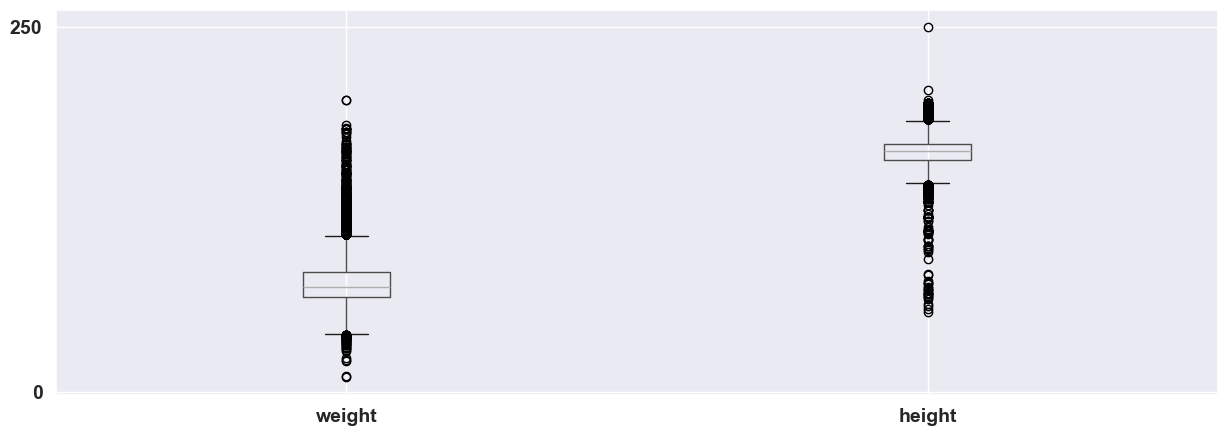

In [203]:
#Box PLot visualization 
plt.figure(figsize=(15,5))
df.boxplot(['weight','height'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

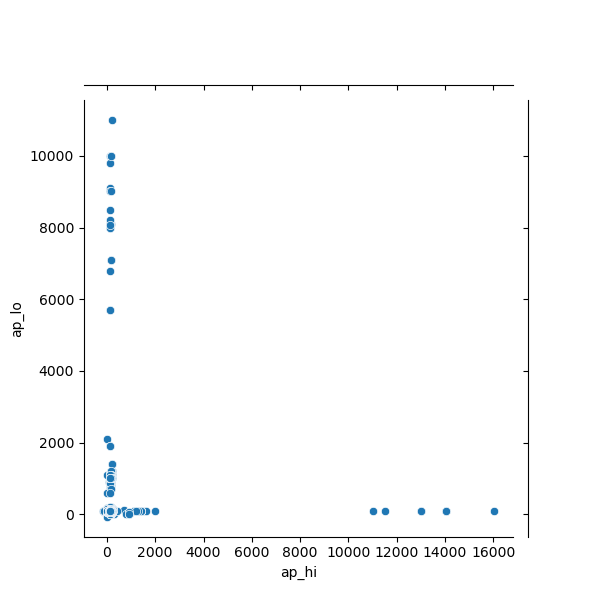

In [7]:
# Joint Plot Visualization using Seaborn
import matplotlib
s=sns.jointplot(x='ap_hi', y='ap_lo', data=df);


[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

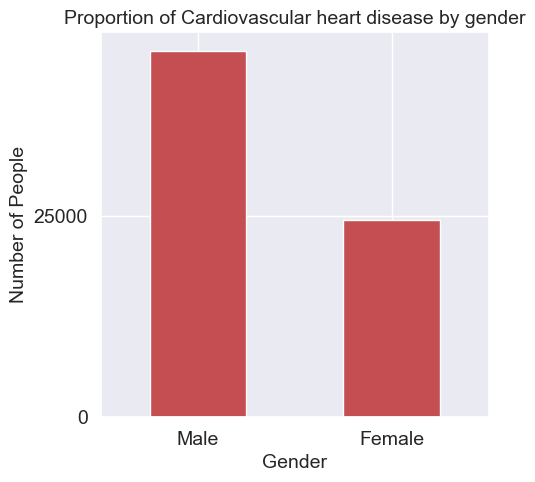

In [43]:
# Graphical Representaion of count of unique values in Gender Column
gender= df['gender'].value_counts()
plt.figure(figsize=(5, 5))
ax = gender.plot(kind='bar', rot=0, color="r", fontsize=14)
ax.set_title("Proportion of Cardiovascular heart disease by gender", y = 1, fontsize=14)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Number of People',fontsize=14)
ax.set_xticklabels(('Male', 'Female'))

In [11]:
df.cardio.value_counts()


cardio
0    35021
1    34979
Name: count, dtype: int64

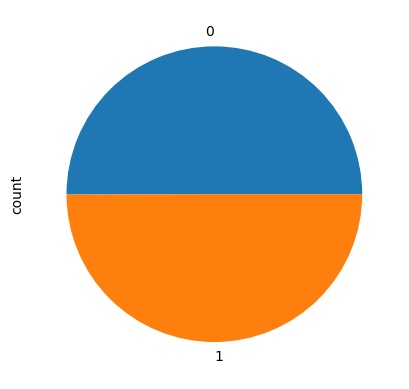

In [13]:
df.cardio.value_counts().plot(kind="pie"); #Pie Chart representation of count of unique values in the target column


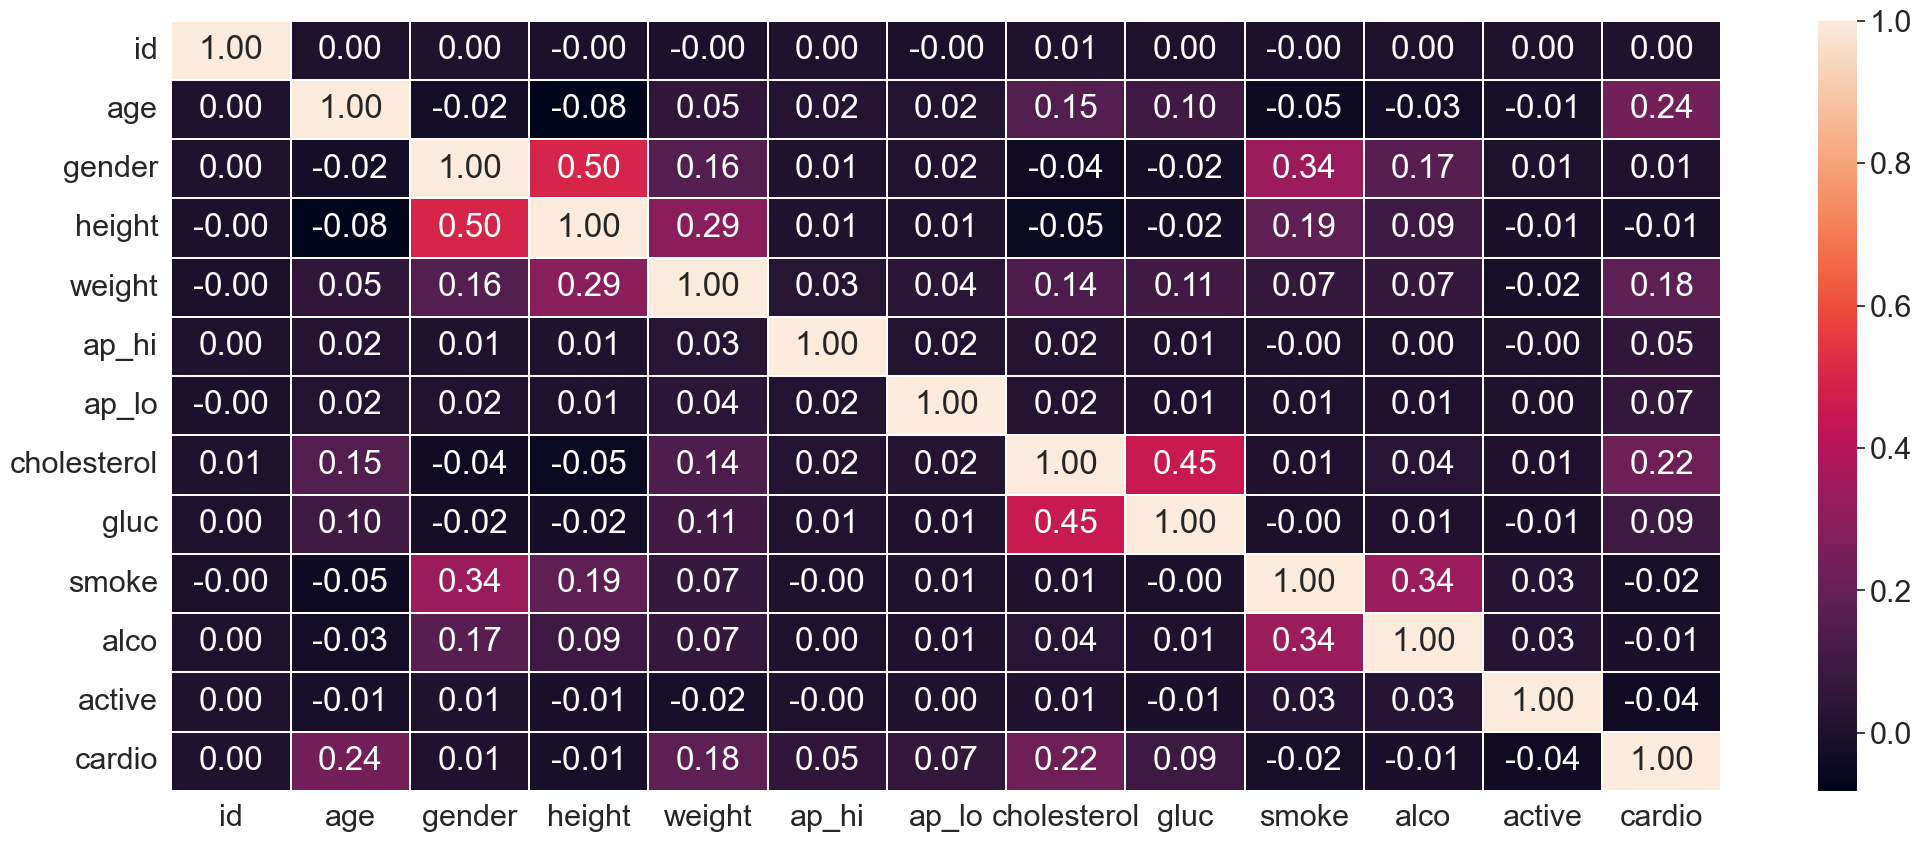

In [15]:
# Correlation matrix using seaborn
cross=df.corr()
sns.set(font_scale=2)
fig,ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(cross,
                  annot=True,
                  linewidths=0.2,
                fmt=".2f");


machine modelling

In [7]:
# Splitting the data into Training and Testing
x = df.drop(columns = ['cardio'])
y = df['cardio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=11)


In [19]:
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x.shape


(14000, 12)
(56000,)
(14000,)


(70000, 12)

In [9]:
# Machine Learning modelling
rf = RandomForestClassifier()
r=rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(r)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)

lr = LogisticRegression(solver="liblinear",max_iter=10000)
l=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(l)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy1)

sv = svm.SVC()
s=sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(s)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy2)

de = DecisionTreeClassifier()
d=de.fit(x_train,y_train)
y_pred = de.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print(d)
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy3)


RandomForestClassifier()
Recall:  0.7236428571428571
Precision:  0.7236428571428571
Accuracy:  0.7236428571428571
LogisticRegression(max_iter=10000, solver='liblinear')
Recall:  0.7072142857142857
Precision:  0.7072142857142857
Accuracy:  0.7072142857142857
SVC()
Recall:  0.5983571428571428
Precision:  0.5983571428571428
Accuracy:  0.5983571428571428
DecisionTreeClassifier()
Recall:  0.6338571428571429
Precision:  0.6338571428571429
Accuracy:  0.6338571428571429


In [ ]:
#tuning knn


In [9]:
grid={"C":np.logspace(-4,4,20),                            
       "solver":["liblinear"]}                       
rf_grid={"n_estimators":np.arange(10,1000,50),       
          "max_depth":[None,2,5,10],                 
          "max_features":list(np.arange(0.3, 0.6, 0.1)) + ["sqrt"],            
          "min_samples_split":np.arange(2,20,2),     
          "min_samples_leaf":np.arange(1,20,2)}      

In [161]:
log=RandomizedSearchCV(LogisticRegression(),
                       param_distributions=grid,
                       n_iter=5,
                       cv=5,                      
                       verbose=3              
                       )
log.fit(x_train,y_train)
log.score(x_test,y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.012742749857031334, solver=liblinear;, score=0.712 total time=   0.6s
[CV 2/5] END C=0.012742749857031334, solver=liblinear;, score=0.701 total time=   0.7s
[CV 3/5] END C=0.012742749857031334, solver=liblinear;, score=0.706 total time=   0.4s
[CV 4/5] END C=0.012742749857031334, solver=liblinear;, score=0.702 total time=   0.7s
[CV 5/5] END C=0.012742749857031334, solver=liblinear;, score=0.707 total time=   0.6s
[CV 1/5] END C=1438.44988828766, solver=liblinear;, score=0.715 total time=   0.5s
[CV 2/5] END C=1438.44988828766, solver=liblinear;, score=0.700 total time=   0.6s
[CV 3/5] END C=1438.44988828766, solver=liblinear;, score=0.705 total time=   0.3s
[CV 4/5] END C=1438.44988828766, solver=liblinear;, score=0.703 total time=   0.7s
[CV 5/5] END C=1438.44988828766, solver=liblinear;, score=0.708 total time=   0.9s
[CV 1/5] END C=0.03359818286283781, solver=liblinear;, score=0.713 total time=   0.5s
[CV 

0.7071428571428572

In [11]:
np.random.seed(42)
clf=RandomForestClassifier()
rd= RandomizedSearchCV(estimator=clf,
                          param_distributions=rf_grid,
                          n_iter=20,
                          cv=3,
                          verbose=2,
                          n_jobs=4)
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


0.7347857142857143

RANDOM FOREST HAS BETTER ACCURACY

In [13]:
y_preds=rf.predict(x_test)


In [15]:
y_preds

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [29]:
# Confusion Matrix to find False positives, False negatives, True Positives, True Negatives
sns.set(font_scale=30)
fig,ax=plt.subplots(figsize=(100,100))
plt.rcParams.update({'font.size': 100})
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15,rotation=90)

sns.heatmap(confusion_matrix(y_test,y_preds),
           annot=True,
           linewidths=0.5)


<Axes: >

In [171]:
# Classification report
print(classification_report(y_test,y_preds))                   
                                                               

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7030
           1       0.73      0.70      0.72      6970

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



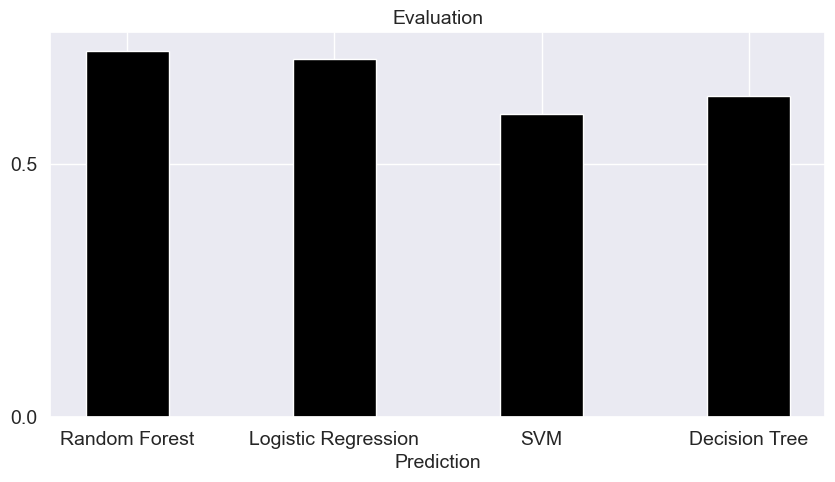

In [33]:
# Grpahical visualization of each machine learning models for finding the model with better accuracy 
fig = plt.figure(figsize = (10,5))

# creating the bar plot
graph={"Random Forest":accuracy,
       "Logistic Regression":accuracy1,
       "SVM":accuracy2,
       "Decision Tree":accuracy3}
g1= list(graph.keys())
g2= list(graph.values())

plt.bar(g1,g2,color ='black', 
        width = 0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Prediction",fontsize=14)
plt.title("Evaluation",fontsize=14)
plt.show()
 

In [173]:
# Importing Test Data
df1=pd.read_csv("heart_test1.csv")
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1,48,1,150,120,138,100,3,3,0,1,0


In [183]:
# Checks the machine learning model (Random Forest) with the test data
predict=lr.predict(df1)
if predict[0]==1:
    print("Risk of Heart disease is high")
else:
    print("Risk of heart Disease is low");

Risk of Heart disease is high
